In [1]:
import pandas as pd
import numpy as np

In [80]:
df=pd.read_parquet("AAPL_20y.parquet")

In [82]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

df = df[df.index.year != 2005]

In [81]:

df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [83]:
df.dropna(inplace=True)

In [84]:
df['returns'] = 100 * df.Close.pct_change().dropna()
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1)).dropna()

In [85]:
window = 21  # e.g., 1 month
df['rolling_vol'] = df['log_return'].rolling(window).std() * np.sqrt(252)

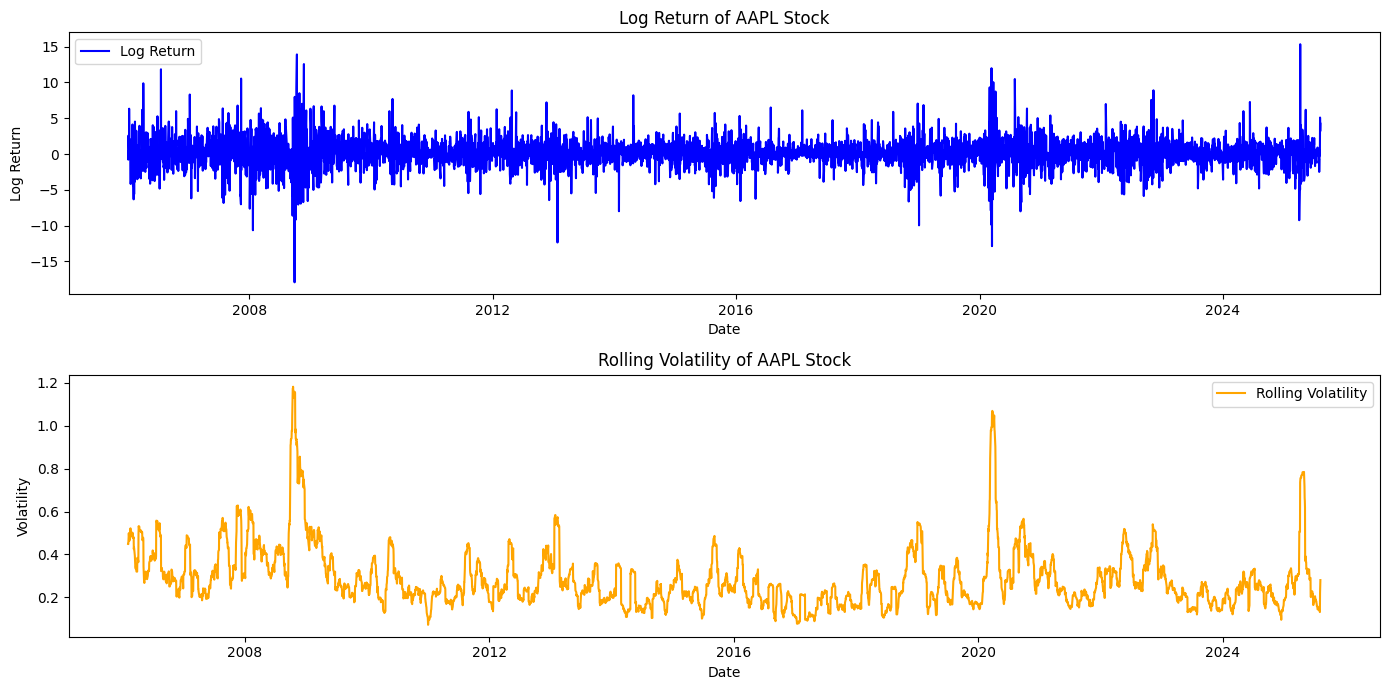

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df.index,df['returns'], label='Log Return', color='blue')
plt.title('Log Return of AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df.index, df['rolling_vol'], label='Rolling Volatility', color='orange')
plt.title('Rolling Volatility of AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
a=df.groupby(df.index.year).size()
a


Date
2006    251
2007    251
2008    253
2009    252
2010    252
2011    252
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    252
2020    253
2021    252
2022    251
2023    250
2024    252
2025    150
dtype: int64

In [88]:
df.to_parquet("AAPL_20y_returns.parquet", index=True)